## Problema 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.utils.fixes import signature

Comenzamos importando los datos pre-procesados en las matrices de atributos $X_t$ (entrenamiento) y $X_v$ (validación) y los vectores de etiquetas $Y_t$ (entrenamiento) y $Y_v$ (validación).

In [2]:
spam = pd.read_csv('spam.csv', header=None, delimiter=" ")
sval = spam.values
training_data, test_data = tts(sval, test_size=0.30)
Xt = training_data[:, :-1]
Yt = training_data[:, -1]
Xv = test_data[:, :-1]
Yv = test_data[:, -1]

### SPAM

#### Clasificador bayesiano ingenuo

Ya que en este caso el vector de entrada está separado de tal forma que la presencia/ausencia de una palabra es un atributo, no hay que hacer ningún encoding de la matriz de entrada. Procedemos a calcular el desempeño del clasificador tal y como se hizo en el problema anterior.

In [3]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(Xt, Yt)
print 'Tasa de predicciones correctas para:'
print 'Datos de entrenamiento: %0.04f' % mnb.score(Xt, Yt)
print 'Datos de validación: %0.04f' % mnb.score(Xv, Yv)

Tasa de predicciones correctas para:
Datos de entrenamiento: 0.9544
Datos de validación: 0.9504


#### Regresión Logística

Nuevamente colocamos las funciones definidas en el problema anterior, para obtener el vector de parámetros por medio de un descenso de gradiente. La única diferencia es que en esta ocasión, al gradiente la añadimos un término de regularización (con el fin de evitar el overfitting, como en los problemas 1 y 2).

In [4]:
def logistic_regression(Xt, Yt, lambda_val, rate, n):
    # Create design matrix
    phi_Xt = np.column_stack((np.ones(Xt.shape[0]), Xt))
    # Initialize theta
    theta = np.ones(Xt.shape[1] + 1)
    # Return vector of parameters theta
    return fit(phi_Xt, Yt, theta, lambda_val, rate, n)
    
# Perform a gradient descent in order to find, given a set of inputs Xt and labels Yt, the
# parameters theta. This gradient descent uses a learning rate "rate", through n iterations
def fit(Xt, Yt, theta, lambda_val, rate, n):
    for i in range(n):
        theta = update_theta(Xt, Yt, theta, lambda_val, rate)
    return theta

# Helper function for gradient descent
def update_theta(Xt, Yt, theta, lambda_val, rate):
    Yh = predict(Xt, theta)
    # Calculate the gradient descent
    gradient = (1.0/Xt.shape[0])*np.dot(Xt.T, Yh - Yt) + 2*lambda_val*theta
    gradient *= rate
    theta -= gradient
    return theta

# Make predictions over X inputs with parameters theta
def predict(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

def get_probabilities(X, theta):
    phi_X = np.column_stack((np.ones(X.shape[0]), X))
    z = np.dot(phi_X, theta)
    return sigmoid(z)

# Calculate the sigmoid of z (where z is a vector)
def sigmoid(z):
    return 1 / (1 + np.exp(-1*z))

# Classify the probabilities vector Y (if Y(i)>0.5, then Y'(i)=1)
def classify(Y):
    Yc = []
    for p in Y:
        if p > 0.5:
            Yc.append(1)
        else:
            Yc.append(0)
    return Yc

# Calculate the % of correct predictions given a set of actual labels Y, and a set of
# predicted labels Yc
def error(Y, Yc):
    diff = Y - Yc
    return 1.0 - np.count_nonzero(diff) / float(len(diff))

# Calculate the performace of the parameteres theta with the set X/Y
def performance(X, Y, theta):
    Yh = predict(np.column_stack((np.ones(X.shape[0]), X)), theta)
    Yc = classify(Yh)
    return error(Y, Yc)

In [5]:
# Perform several logistic regressions with different values for the regularization paramenter "lambda"
# This function performs a LR with lambda = min_lambda and then it subsequently begins increasing lambda
# by a factor of 10, n times
def test_lambdas_logistic_regression(Xt, Yt, Xv, Yv, n, min_lambda):
    print 'Performance (% of correct predictions) of the logistic regression for: '
    for i in range(n):
        current_lambda = min_lambda*pow(10, i)
        theta = logistic_regression(Xt, Yt, current_lambda, 0.1, 1000)
        print 'lambda = %0.4f' % current_lambda
        print 'T. set - %0.4f' % performance(Xt, Yt, theta)
        print 'V. set - %0.4f' % performance(Xv, Yv, theta)

#### Lambdas pequeñas

Definimos la función _test-lambdas-logistic-regression_ para facilitar el cálculo del desempeño de los clasificadores, bajo distintos valores del parámetro de regularización.

In [6]:
test_lambdas_logistic_regression(Xt, Yt, Xv, Yv, 5, 0.0001)

Performance (% of correct predictions) of the logistic regression for: 
lambda = 0.0001
T. set - 0.9207
V. set - 0.8976
lambda = 0.0010
T. set - 0.9240
V. set - 0.9001
lambda = 0.0100
T. set - 0.9572
V. set - 0.9349
lambda = 0.1000
T. set - 0.8602
V. set - 0.8524
lambda = 1.0000
T. set - 0.7533
V. set - 0.7461


Observamos que se obtiene un mejor desempeño del clasificador para valores pequeños del parámetro de regularización, siendo el mejor $\lambda = 0.001$.

#### Lambdas grandes

Probamos ahora con configuraciones de $\lambda$ superiores a 10.

In [7]:
test_lambdas_logistic_regression(Xt, Yt, Xv, Yv, 5, 10)

Performance (% of correct predictions) of the logistic regression for: 


/home/vicente/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp


lambda = 10.0000
T. set - 0.2898
V. set - 0.2906


/home/vicente/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in multiply


lambda = 100.0000
T. set - 0.7102
V. set - 0.7094
lambda = 1000.0000
T. set - 0.7102
V. set - 0.7094
lambda = 10000.0000
T. set - 0.7102
V. set - 0.7094
lambda = 100000.0000
T. set - 0.7102
V. set - 0.7094


Se observa que el desempeño es, en todos los casos, muy inferior a todos los modelos entrenados con valores de regularización pequeños.

### ROC/Precisión Exhaustividad

In [8]:
def plot_ROC(Y, YProb):
    fpr, tpr, thresholds = metrics.roc_curve(Y, YProb)
    auc = metrics.roc_auc_score(Y, YProb)
    plt.plot(fpr, tpr)
    plt.title('Curva ROC (AUC = %0.2f)' % auc)
    plt.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01),linestyle='--', color='g')
    plt.legend(loc="lower right")
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.show()

def plot_PE(Y, YProb):
    pr, ex, thresholds = metrics.precision_recall_curve(Y, YProb)
    aps = metrics.average_precision_score(Y, YProb)
    step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
    plt.step(ex, pr, color='b',alpha=0.2, where='post')
    plt.fill_between(ex, pr, alpha=0.2, color='b', **step_kwargs)
    plt.title('Curva Precision Exhaustividad (AUC = %0.2f)' % aps)
    plt.legend(loc="lower right")
    plt.xlabel('Exhaustividad')
    plt.ylabel('Precision')
    plt.show()

#### Clasificador Bayesiano Ingenuo

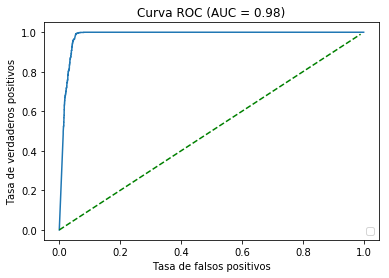

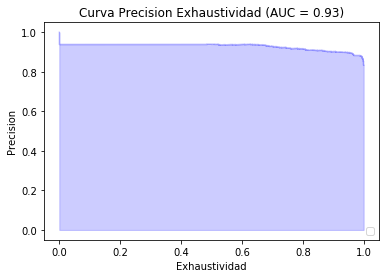

In [9]:
YtProb = mnb.predict_proba(Xt)
plot_ROC(Yt, YtProb[:,1])
plot_PE(Yt, YtProb[:,1])

#### Regresión Logística (lambda = 0.01)

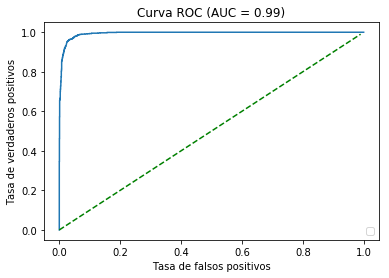

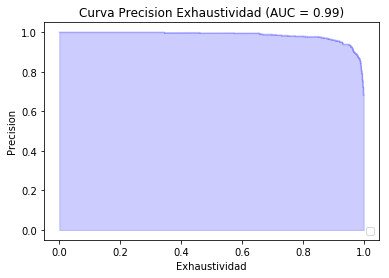

In [10]:
theta = logistic_regression(Xt, Yt, 0.01, 0.1, 1000)
YtProb = get_probabilities(Xt, theta)
plot_ROC(Yt, YtProb)
plot_PE(Yt, YtProb)

### Cáncer de seno

Comenzamos importando los datos de la base _cancer_.

In [11]:
cancer = pd.read_csv('cancer.csv', header=None)
c = cancer.values
cancer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Sabemos que los valores de esta base de datos tiene datos faltantes. Por ese motivo, antes de operar con estos datos, rellenamos los faltantes por medio del método del promedio, descrito y programado ya en la tarea 2.

In [12]:
def fixMissingValues(array, method):
    
    arr = np.copy(array)
    
    if method == 'mean':
        means = []

        sumv = 0
        count = 0
        for j in range(len(arr[0])):
            for i in range(len(arr)):
                if arr[i][j] == '?':
                    continue
                else:
                    sumv = sumv + int(arr[i][j])
                    count = count + 1  
            means.append(int(1.0*sumv/count))
            sumv = 0
            count = 0

        for i in range(len(arr)):
            for j in range(len(arr[0])):
                if arr[i][j] == '?':
                    arr[i][j] = means[j]
                else:
                    arr[i][j] = int(arr[i][j])
        return arr
    
    elif method == 'zero':
        for i in range(len(arr)):
            for j in range(len(arr[0])):
                if arr[i][j] == '?':
                    arr[i][j] = 0
                else:
                    arr[i][j] = int(arr[i][j])
        return arr

    return None

Una vez que los valores faltantes han sido "rellenados", podemos separar los datos en las matrices de atributos $X_t$ (entrenamiento) y $X_v$ (validación) y los vectores de etiquetas $Y_t$ (entrenamiento) y $Y_v$ (validación).

In [13]:
cnmv = fixMissingValues(c, 'mean')
training_data, test_data = tts(cnmv, test_size=0.30)
Xt = training_data[:, 1:-1]
Yt = np.transpose(training_data[:, 10:]).flatten()
Xv = test_data[:, 1:-1]
Yv = np.transpose(test_data[:, 10:]).flatten()

Yt = np.array(list((Yt - 2)/2))
Yv = np.array(list((Yv - 2)/2))

#### Reparametrización de los vectores de entrada

Para esta base de datos, tenemos nuevamente un caso donde cada atributo toma valores enteros del 1-10, pero estos valores no implican un orden. Para evitar que nuestro clasificador dé peso a este orden inexistente, realizamos un One Hot Encoding de forma similar a como se hizo en el problema 3. Los 9 atributos de la base original se convertiran en 9 x 10 = 90 atributos totales, pues para cada atributo hay 10 categorías distintas.

In [14]:
atts_categories = []
for i in range(9):
    atts_categories.append(np.arange(1,11))

enct = OneHotEncoder(categories=atts_categories)
# Training set
enct.fit(Xt)
Xte = enct.transform(Xt).toarray()
# Validation set 
encv = OneHotEncoder(categories=atts_categories)
encv.fit(Xv)
Xve = encv.transform(Xv).toarray() 

### Clasificador bayesiano ingenuo

Ya que hemos pre-procesado nuestros datos de manera que tanto los datos de entrada como los datos de salida son binarios, podemos utilizar un clasificador bayesiano ingenuo de distribución binomial. Usamos pues la clase _BernoulliNB_ para este fin.

In [15]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(Xte, Yt)
print 'Tasa de predicciones correctas para:'
print 'Datos de entrenamiento: %0.04f' % bnb.score(Xte, Yt)
print 'Datos de validación: %0.04f' % bnb.score(Xve, Yv)

Tasa de predicciones correctas para:
Datos de entrenamiento: 0.9652
Datos de validación: 0.9905


### Clasificador por regresión logística

Utilizando la misma función empleada para la base de datos de SPAM, medimos el desempeño de nuestro modelo usando parámetros de regularización pequeños y grandes.

#### Lambdas pequeñas

In [16]:
test_lambdas_logistic_regression(Xte, Yt, Xve, Yv, 5, 0.0001)

Performance (% of correct predictions) of the logistic regression for: 
lambda = 0.0001
T. set - 0.9632
V. set - 0.9810
lambda = 0.0010
T. set - 0.9652
V. set - 0.9810
lambda = 0.0100
T. set - 0.9652
V. set - 0.9762
lambda = 0.1000
T. set - 0.9407
V. set - 0.9667
lambda = 1.0000
T. set - 0.8200
V. set - 0.8571


#### Lambdas grandes

In [17]:
test_lambdas_logistic_regression(Xte, Yt, Xve, Yv, 5, 10)

Performance (% of correct predictions) of the logistic regression for: 
lambda = 10.0000
T. set - 0.3538
V. set - 0.3238
lambda = 100.0000
T. set - 0.6462
V. set - 0.6762
lambda = 1000.0000
T. set - 0.6462
V. set - 0.6762
lambda = 10000.0000
T. set - 0.6462
V. set - 0.6762
lambda = 100000.0000
T. set - 0.6462
V. set - 0.6762


/home/vicente/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in exp
/home/vicente/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in multiply


### ROC/Precisión Exhaustividad

#### Clasificador Bayesiano Ingenuo

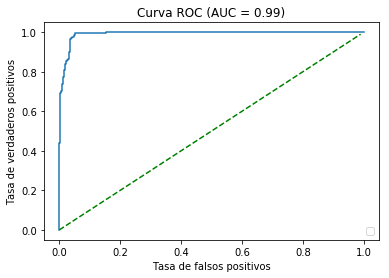

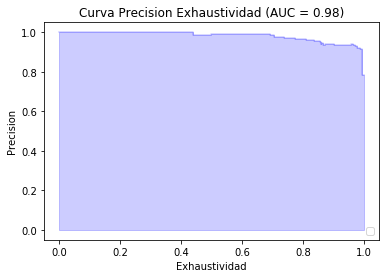

In [18]:
YtProb = bnb.predict_proba(Xte)
plot_ROC(Yt, YtProb[:,1])
plot_PE(Yt, YtProb[:,1])

#### Regresión Logística (lambda = 0.0001)

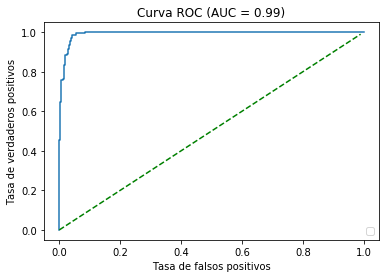

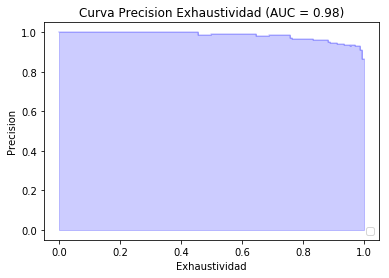

In [19]:
theta = logistic_regression(Xte, Yt, 0.0001, 0.1, 1000)
YtProb = get_probabilities(Xte, theta)
plot_ROC(Yt, YtProb)
plot_PE(Yt, YtProb)